# Natural Gas Data

In this first task, carry out analysis the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. The available dataset corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024. Trying to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. I will try to use the Time Series Method with the Autoregressive Integrated Moving Average (ARIMA) Model. 

## Import Library

First of all, I will import the library first.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import datetime

## Load File

Then load the dataset for further analysis.

In [2]:
nat_gas = pd.read_csv('Nat_Gas.csv')
nat_gas.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


## Preprocessing Data

In the dataset, the Dates column is not in datetime format, it must be changed first.

In [3]:
nat_gas['Dates'] = pd.to_datetime(nat_gas['Dates'])
nat_gas.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13556\2195520646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas['Dates'] = pd.to_datetime(nat_gas['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In order to use the models provided by the stats library, I need to set the date column to be a dataframe index.

In [4]:
nat_gas.set_index('Dates', inplace=True)
nat_gas.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


Then at the Data Preprocessing stage I want to know whether there is empty data, and how much it is.

In [5]:
print(nat_gas.isna().any())
print(nat_gas.isna().sum())

Prices    False
dtype: bool
Prices    0
dtype: int64


It turned out that there was no empty data, so I could continue to plot the data.

## Plot The Data

At the data plotting stage I used a line plot to determine the direction of price movements.

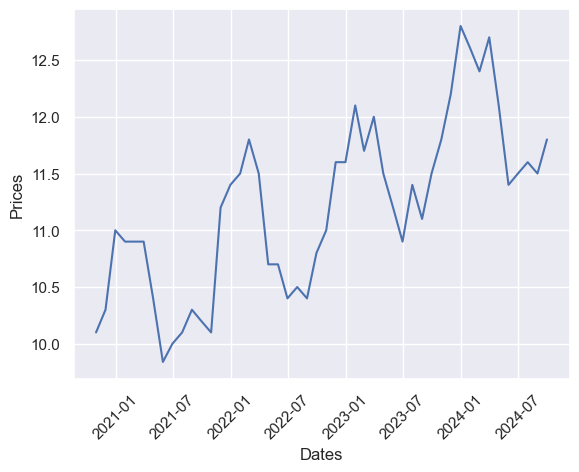

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(nat_gas.index, nat_gas['Prices'])
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)
plt.show()

## Model Selection & Training

Then in the next stage, I do model selection and model training. At this stage I choose the ARIMA model. Then for the parameters $p$, $d$, $q$ I choose 5, 1, 0 in sequence.

In [7]:
from statsmodels.tsa.arima.model import ARIMA

y = nat_gas['Prices']

ARIMAmodel = ARIMA(y, order=(5, 1, 0)).fit()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


## ARIMA Method

Then we apply it to the data. Here we want to do forecasting 1 year ahead.

In [8]:
forecast = ARIMAmodel.get_forecast(steps=12)
forecast_index = pd.date_range(start=nat_gas.index[-1] + pd.DateOffset(1), periods=12, freq='M')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index

C:\Users\hp\AppData\Local\Temp\ipykernel_13556\1370702970.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=nat_gas.index[-1] + pd.DateOffset(1), periods=12, freq='M')


In the final stage I do plotting to find out what the forecast that has been made looks like.

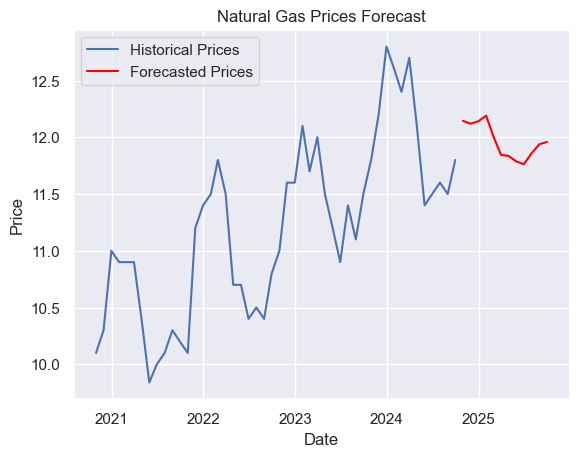

In [9]:
plt.plot(nat_gas, label='Historical Prices')
plt.plot(forecast_df['mean'], label='Forecasted Prices', color='red')
plt.title('Natural Gas Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()